### <center> Importer les bibliothèques nécessaires  </center>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import skimage
from imblearn import over_sampling
from   imblearn.over_sampling import SMOTE
from   collections import Counter
from   PIL import Image
from   skimage.transform import resize
from   skimage import io
from   sklearn.model_selection import train_test_split
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### <center> Importer notre jeu de données  </center>

In [2]:
DATADIR = r"C:\Users\kawtar\Desktop\lettre\mnist-arabic-images/"
X = []
y = []
clas = 0
dos = os.listdir(DATADIR)
size = (28, 28)

for path, dir, files in os.walk(DATADIR):
    if dir:
        for p in dir :
            for path, dir, files in os.walk(DATADIR + '\\' + p) :
                for f in files :
                    imagePaths = path + '\\' + f
                    img = cv2.imread(imagePaths,2)
                    ret, bw_img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
                    bw_img = resize(bw_img, (28,28))
                    X.append(bw_img)
                    
                    label = dos[clas]
                    y.append(label)
                clas = clas + 1
X = np.array(X,dtype=int)
y = np.array(y)
dataset_size = X.shape[0]
X = X.reshape(dataset_size,-1)

In [3]:
print('Overall # of samples is', y.shape[0])
print('Size of the features is:', X.shape)

Overall # of samples is 7401
Size of the features is: (7401, 784)


### <center> Afficher une image  </center>

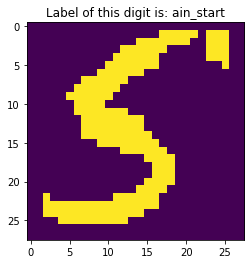

In [4]:
def show_digit(x_vec, label):
    #x_vec = x_vec.to_numpy()
    x_mat = x_vec.reshape(28, 28)
    plt.figure(figsize=(4,4))
    plt.imshow(x_mat)
    plt.title('Label of this digit is: ' + label)
show_digit(X[140,:], y[140])

### <center> Tester l'équilibre entre les classes  </center>

In [5]:
counter = Counter(y)
print(counter)

Counter({'alif': 773, 'alif_end': 622, 'lam_start': 415, 'yae_middle': 323, 'mim_middle': 288, 'seen_middle': 234, 'seen_start': 228, 'waw_end': 203, 'yae_end': 192, 'bae_start': 184, 'dal_end': 184, 'hamza': 179, 'hhae_middle': 177, 'hae_start': 165, 'sheen_middle': 157, 'mim_start': 151, 'rae': 140, 'dal': 137, 'waw': 130, 'noun_start': 126, 'noun_middle': 125, 'rae_end': 125, 'noun': 116, 'kaf_middle': 107, 'ta_middle': 106, 'ain_start': 104, 'hhae_start': 104, 'sheen_start': 99, 'yae_start': 99, 'noun_end': 95, 'mim': 92, 'jeem_start': 85, 'ain_middle': 81, 'seen': 76, 'bae_middle': 68, 'lam_middle': 65, 'tae_marbouta': 64, 'kaf_start': 61, 'bae_end': 56, 'lam_end': 55, 'tae_marbouta_end': 54, 'khae_start': 48, 'fa_middle': 45, 'dad_start': 44, 'ain_end': 27, 'fa_end': 27, 'fa_start': 27, 'ghain_middle': 27, 'jeem': 27, 'khae_middle': 27, 'tae_middle': 27, 'thae': 27, 'qua_middle': 26, 'sad_start': 26, 'tae_end': 26, 'zae_end': 25, 'lam_alif': 23, 'ain': 22, 'alif_maqsora': 22, 'za

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

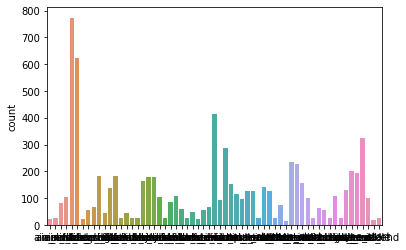

In [6]:
sns.countplot(y)

### <center> Equilibré le jeu de données  </center>

In [7]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [8]:
counter = Counter(y)
print(counter)

Counter({'ain': 773, 'ain_end': 773, 'ain_middle': 773, 'ain_start': 773, 'alif': 773, 'alif_end': 773, 'alif_maqsora': 773, 'bae_end': 773, 'bae_middle': 773, 'bae_start': 773, 'dad_start': 773, 'dal': 773, 'dal_end': 773, 'fa_end': 773, 'fa_middle': 773, 'fa_start': 773, 'ghain_middle': 773, 'hae_start': 773, 'hamza': 773, 'hhae_middle': 773, 'hhae_start': 773, 'jeem': 773, 'jeem_start': 773, 'kaf_middle': 773, 'kaf_start': 773, 'khae_middle': 773, 'khae_start': 773, 'lam_alif': 773, 'lam_end': 773, 'lam_middle': 773, 'lam_start': 773, 'mim': 773, 'mim_middle': 773, 'mim_start': 773, 'noun': 773, 'noun_end': 773, 'noun_middle': 773, 'noun_start': 773, 'qua_middle': 773, 'rae': 773, 'rae_end': 773, 'sad_start': 773, 'seen': 773, 'seen_end': 773, 'seen_middle': 773, 'seen_start': 773, 'sheen_middle': 773, 'sheen_start': 773, 'tae_end': 773, 'tae_marbouta': 773, 'tae_marbouta_end': 773, 'tae_middle': 773, 'ta_middle': 773, 'thae': 773, 'waw': 773, 'waw_end': 773, 'yae_end': 773, 'yae_mi

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

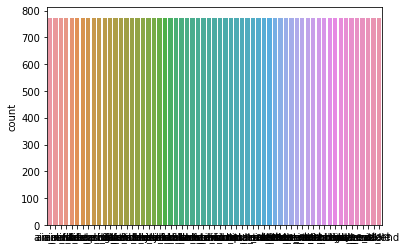

In [9]:
sns.countplot(y)

## <font color='blue'>  Random Forest </font> 

### <center> Importer les bibliothèques nécessaires pour le modèle Random Forest</center>

In [10]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
from sklearn.datasets import fetch_openml # Used to load the MNIST Original dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


### <center> Deviser le jeu de données </center>

In [11]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2  )
print("X_test :",X_test.shape)
print("y_test :",y_test.shape)
print("X_train :",X_train.shape)
print("y_train :",y_train.shape)

X_test : (9431, 784)
y_test : (9431,)
X_train : (37722, 784)
y_train : (37722,)


### <center> L'estimation du paramètre <font color='blue'> n_estimators </font> </center>

In [12]:
val_score_train = [] # list pour stocké les vqleurs d'entrainement
val_score_test = [] # list pour stocké les vqleurs de test
k_range = range(999,1010)  # prend range de 999 à 1009
for k in k_range:
    model = RandomForestClassifier(n_estimators=k) # appliquer model random forest
                                                   # avec nbr estimateurs entre 999 et 1009
    model.fit(X_train, y_train) # fit model
    score_train=model.score(X_train,y_train) # calcule accuracy train
    score_test=model.score(X_test, y_test) # calcule accuracy test
    val_score_train.append(score_train) # ajouter résultat en list
    val_score_test.append(score_test)  
    # affiche le résultat 
    print('ITER ',k,' TRAINING SCORE ',score_train,' TEST SCORE ',score_test) 

ITER  999  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9327748913158732
ITER  1000  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9339412575548722
ITER  1001  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9335171243770544
ITER  1002  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9334110910825999
ITER  1003  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9336231576715088
ITER  1004  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9329869579047821
ITER  1005  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9338352242604178
ITER  1006  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9338352242604178
ITER  1007  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9337291909659633
ITER  1008  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.9340472908493267
ITER  1009  TRAINING SCORE  0.9751603838608769  TEST SCORE  0.933199024493691


   ### <center> Afficher le courbe du résultat </center>

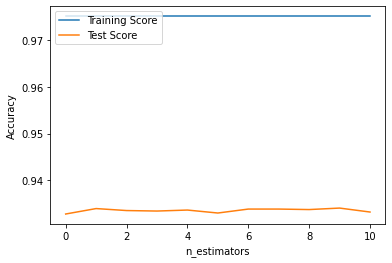

In [13]:
plt.plot(val_score_train)
plt.plot(val_score_test)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend(['Training Score','Test Score'],loc='upper left')
plt.show()

### <center> Appliquer Random Forest </center>

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
print('train score:', rfc.score(X_train, y_train))
print('test score:', rfc.score(X_test, y_test))

train score: 0.9744711309050421
test score: 0.9391368889831407


In [127]:
y_pred=rfc.predict(X_test)

### <center> Evaluer le modèle </center>

#### <font color='green'> Taux d'erreur, Taux de réussite, Précision, Taux de détection, F1-score </font> 

In [128]:
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_pred, average='weighted') 
print("Taux d'erreur : {}".format(1-accuracy_score(y_test,y_pred)))
print("Taux de réussite : {}".format(accuracy_score(y_test,y_pred)))
print('Précision : '+(str(precision)))
print('Taux de détection : '+(str(recall)))
print('F1-score : '+(str(fscore)))

Taux d'erreur : 0.06086311101685926
Taux de réussite : 0.9391368889831407
Précision : 0.949831797592206
Taux de détection : 0.9391368889831407
F1-score : 0.941637640480587


#### <font color='green'> Matrice de Confusion </font> 

In [129]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[161,   0,   0, ...,   0,   0,   0],
       [  0, 142,   0, ...,   0,   0,   0],
       [  0,   0, 154, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 153,   0,   0],
       [  0,   0,   0, ...,   0, 141,   0],
       [  0,   0,   0, ...,   0,   0, 170]], dtype=int64)

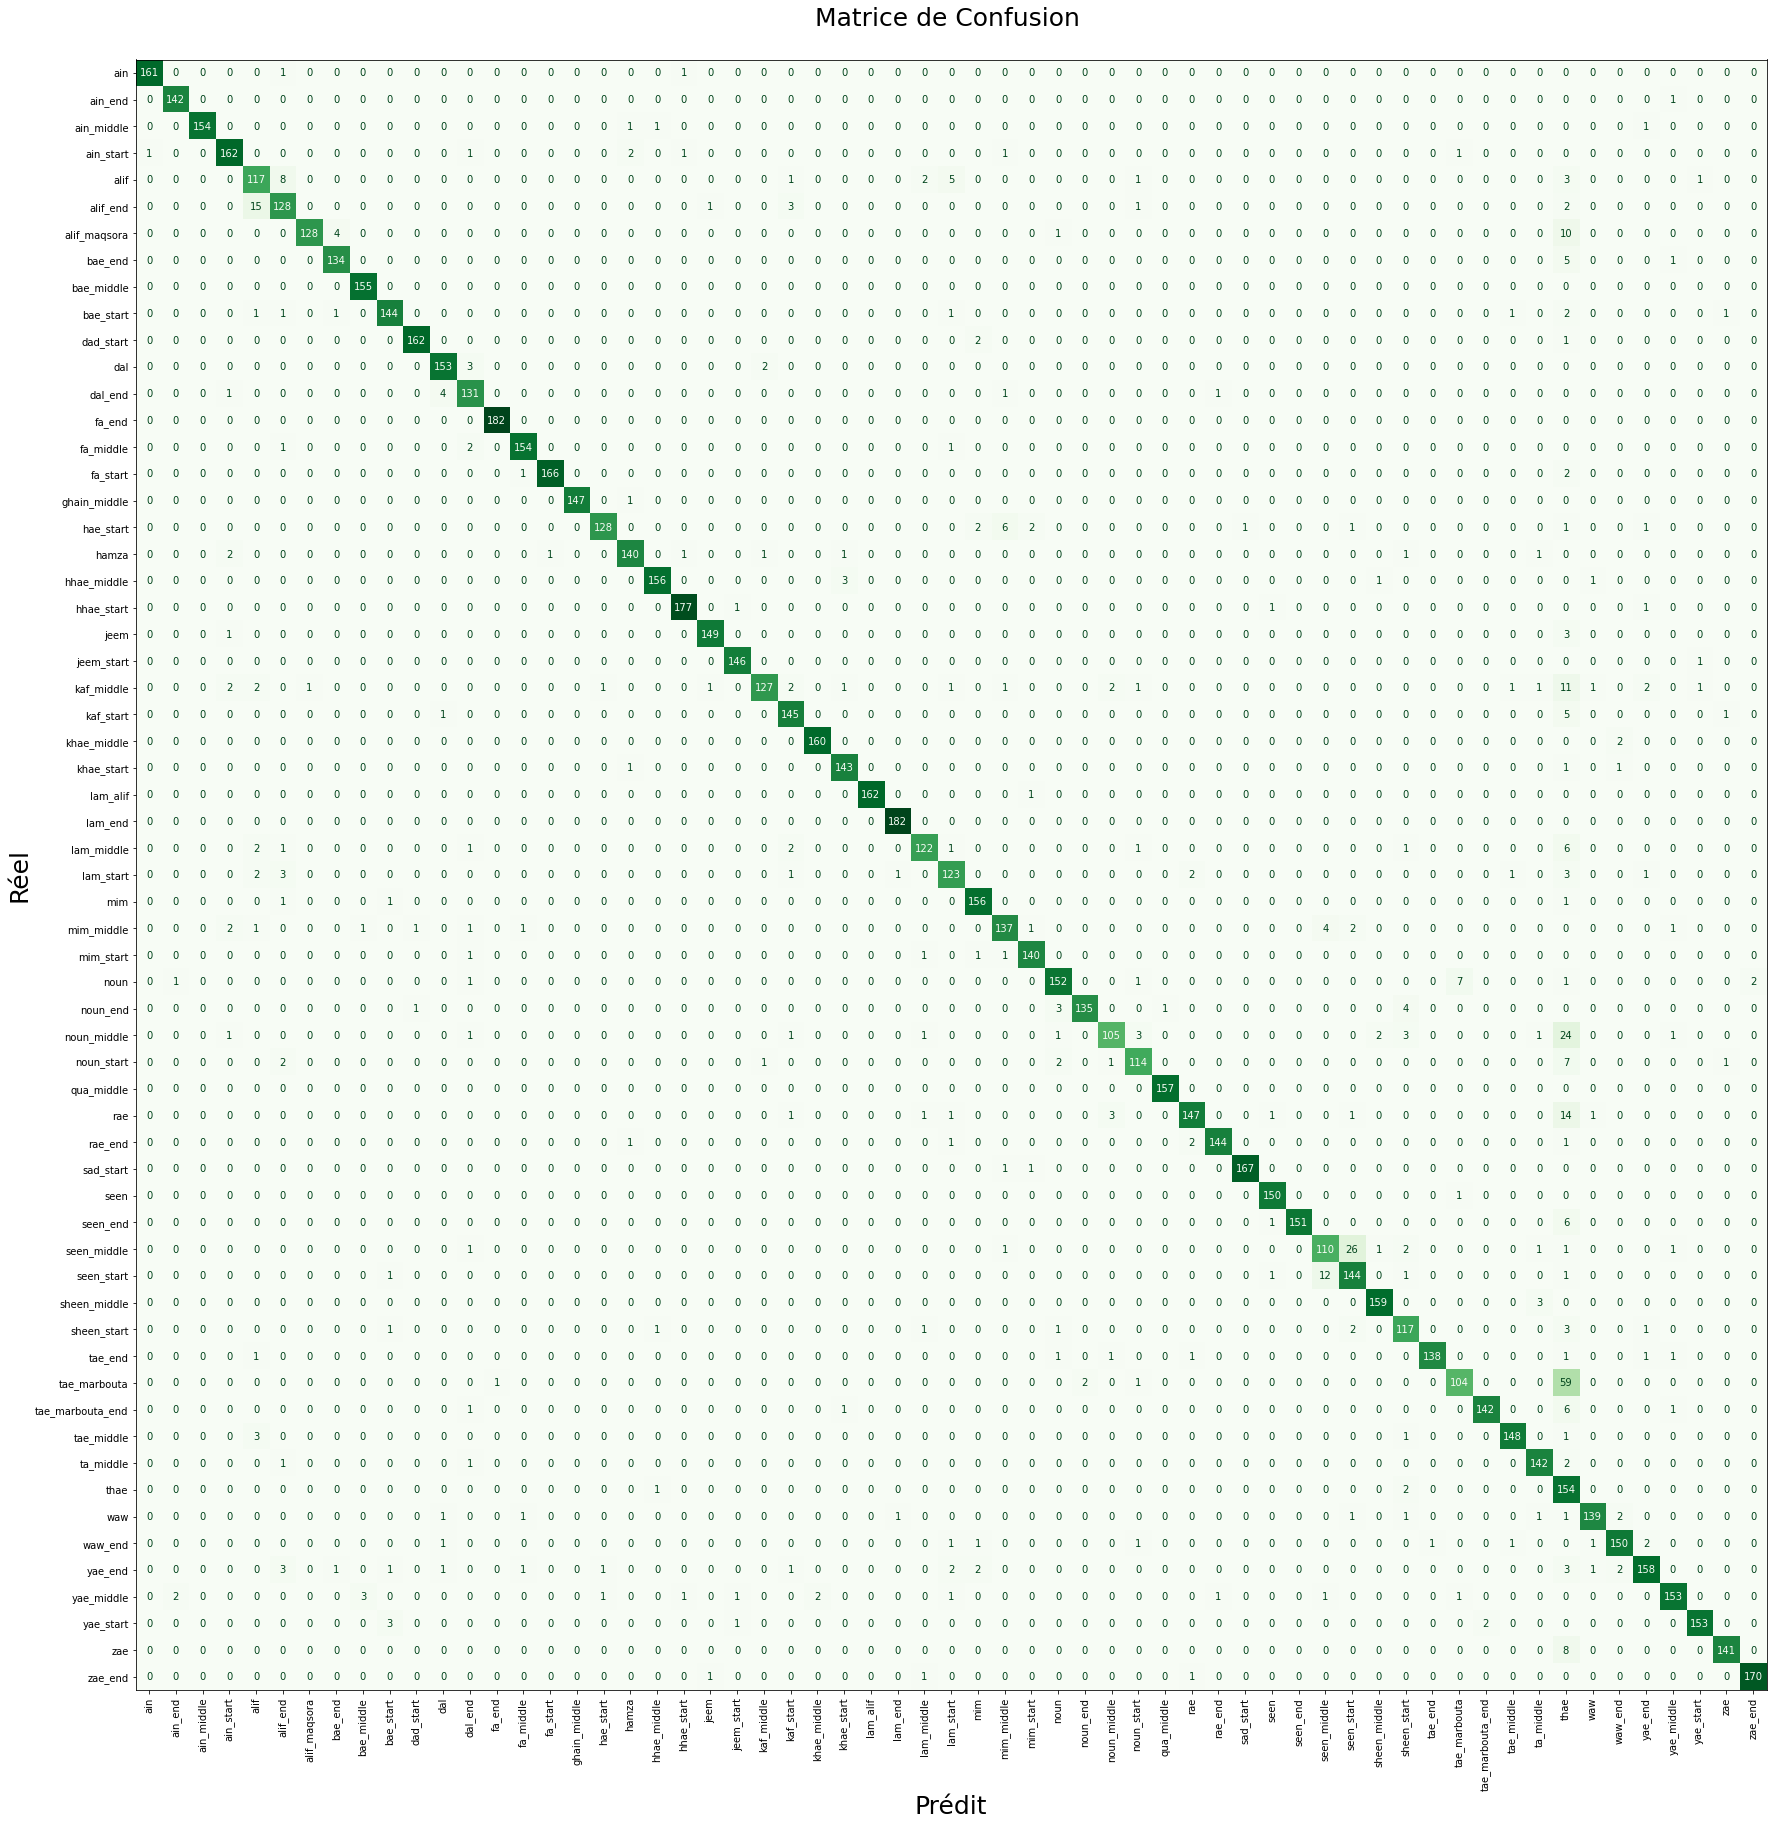

In [130]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay   
cm=confusion_matrix(y_test,y_pred)
      
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dos)
fig, ax = plt.subplots(figsize=(30,30))
disp.plot(xticks_rotation = 'vertical', ax = ax ,values_format='g', cmap="Greens", colorbar = False)
plt.xlabel("y_pred", fontsize = 25)
plt.ylabel("y_true", fontsize = 25)
plt.xlabel('Prédit', fontsize = 25)
plt.ylabel('Réel', fontsize = 25)
plt.title('Matrice de Confusion \n', fontsize = 25)
plt.show()